<a href="https://colab.research.google.com/github/abbyleppert/Data-Science/blob/main/Leppert_Stats_final_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://tensorspace.org/

In [38]:
%%capture
!pip install wandb # running wandb
!apt-get install poppler-utils # changes pdf to different formats 
!pip install pdf2image #can be used to convert PDFs to PIL image objects which can then be saved as .png files or something similar
!pip install flashtorch # installs torchfire 
import requests # request imports 
from pdf2image import convert_from_path
import matplotlib.pyplot as plt # imports matplotlib as plt
import numpy as np # import numpy as np
import torch # imports torch 
import requests
from torchvision import *
from torchvision.models import *
from flashtorch.utils import apply_transforms
import wandb as wb # imports wandb as wb

In [39]:
def GPU(data): # python function with a multi-dimensional matrix containing elements of a single data type
    return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))

def GPU_data(data): # same code as above ^^
    return torch.tensor(data, requires_grad=False, dtype=torch.float, device=torch.device('cuda'))

def plot(x): # plotting the matrix into a subplot
    fig, ax = plt.subplots()
    im = ax.imshow(x, cmap = 'gray') # gives a color map for the plot 
    ax.axis('off')
    fig.set_size_inches(5, 5) # sets size of the plot 
    plt.show()
    
def get_google_slide(url): # gives ability to drop google slides link into python 
    url_head = "https://docs.google.com/presentation/d/" # the url head
    url_body = url.split('/')[5]
    page_id = url.split('.')[-1]
    return url_head + url_body + "/export/pdf?id=" + url_body + "&pageid=" + page_id

def get_slides(url): # gets the slides from the url
    url = get_google_slide(url) # renames get google slides to url(faster)
    r = requests.get(url, allow_redirects=True) # renames requests.get to just r so tis easier and faster 
    open('file.pdf', 'wb').write(r.content) # opens slides
    images = convert_from_path('file.pdf', 500) # converts fro patch is run by images now 
    return images

def load(image): # loads images 

    return apply_transforms(image).clone().detach().requires_grad_(True).to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
labels = {int(key):value for (key, value) in requests.get('https://s3.amazonaws.com/mlpipes/pytorch-quick-start/labels.json').json().items()}

model = alexnet(weights='DEFAULT').to(device) # bring in the alex net, sort of like a barcode or fingerprint
model.eval(); # evaluates the model

Downloading: "https://download.pytorch.org/models/alexnet-owt-7be5be79.pth" to /root/.cache/torch/hub/checkpoints/alexnet-owt-7be5be79.pth


  0%|          | 0.00/233M [00:00<?, ?B/s]

In [4]:
url = "https://docs.google.com/presentation/d/1lyE52a0yLCu9iUiKeFmdKayGJhu2Z6fyToXEMKeigoY/edit#slide=id.p" # take to slides where it shows class data
url = "https://docs.google.com/presentation/d/1rtHvJY8qf4aTiK3wBLswUjeAhoxFyIytn-FgQ_GUHYc/edit#slide=id.g1a1a0885ebb_0_256" # my data set 

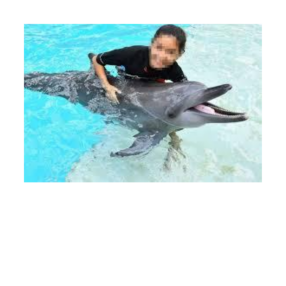

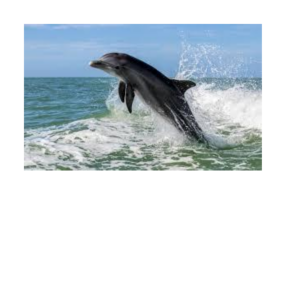

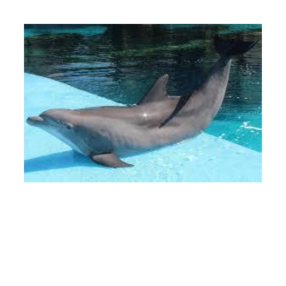

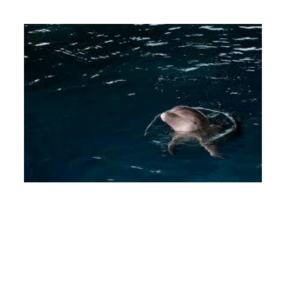

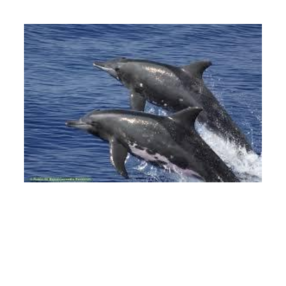

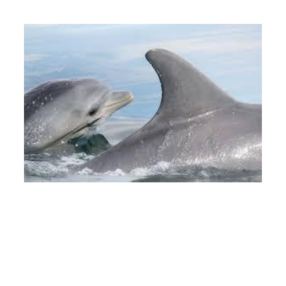

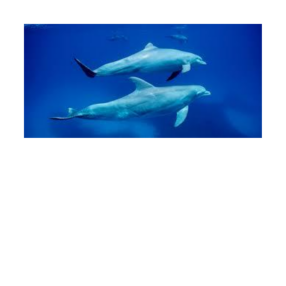

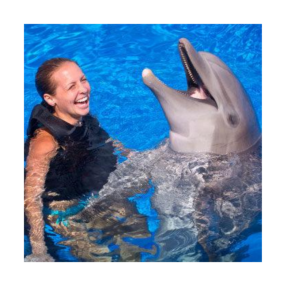

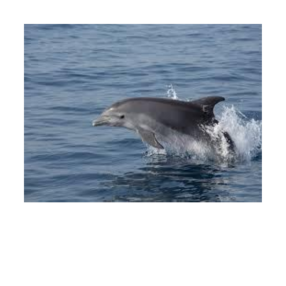

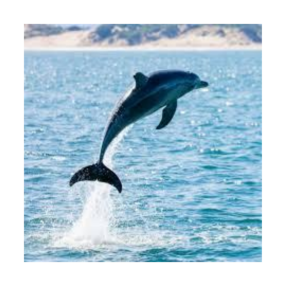

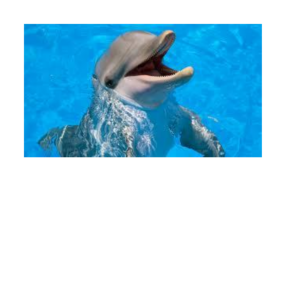

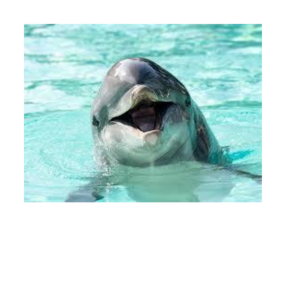

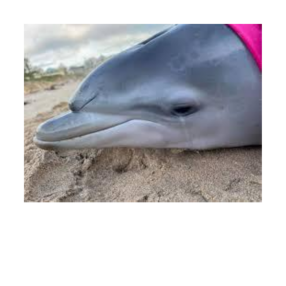

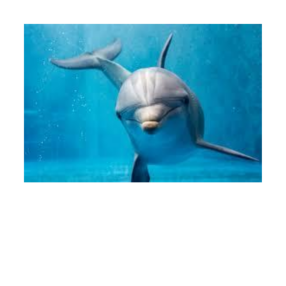

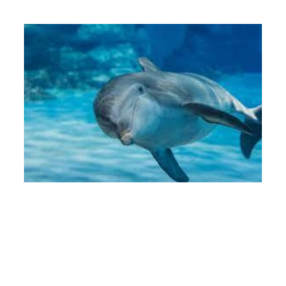

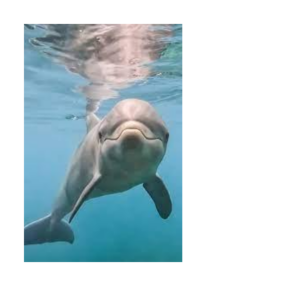

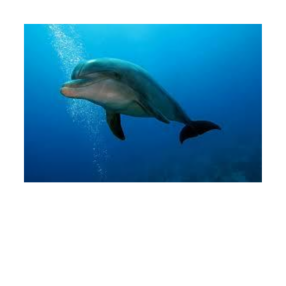

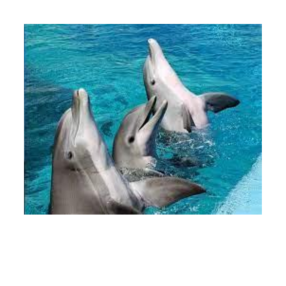

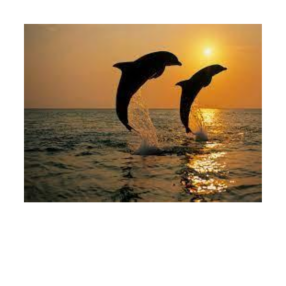

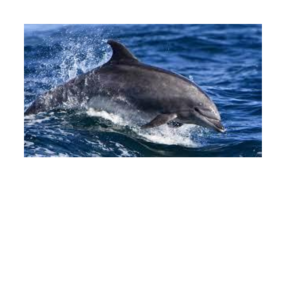

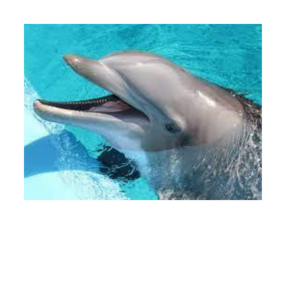

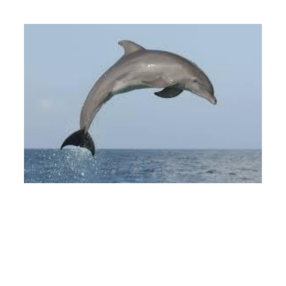

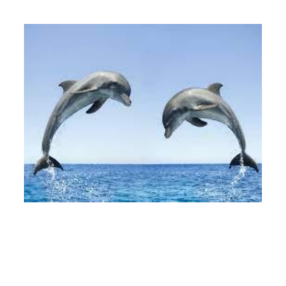

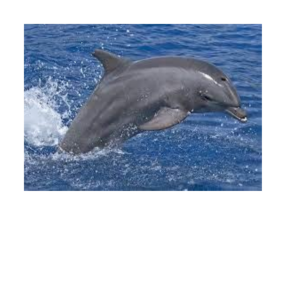

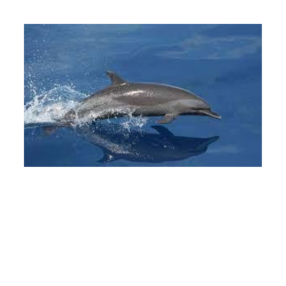

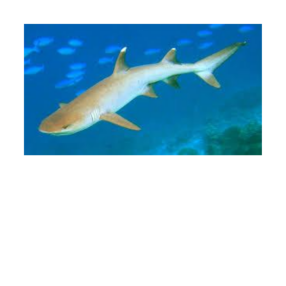

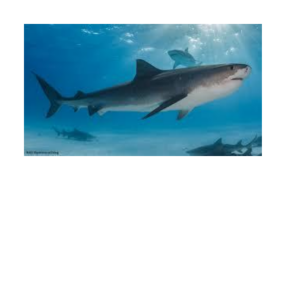

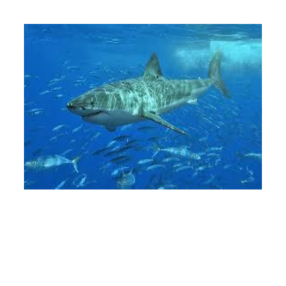

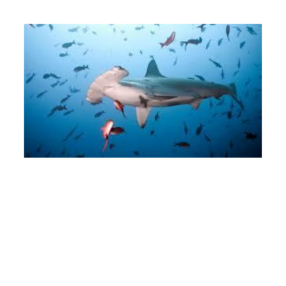

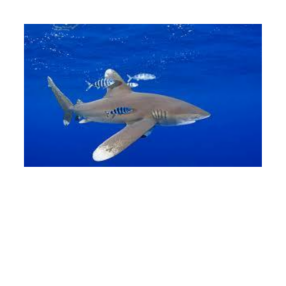

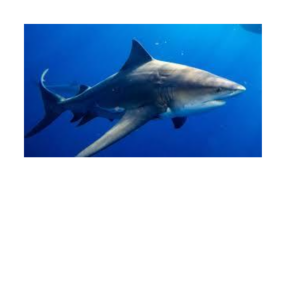

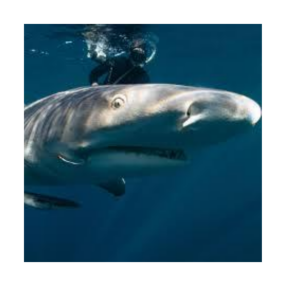

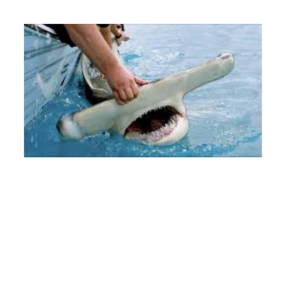

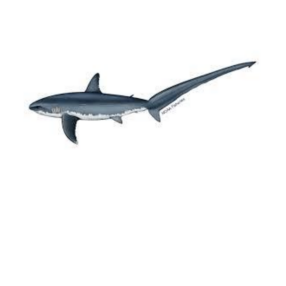

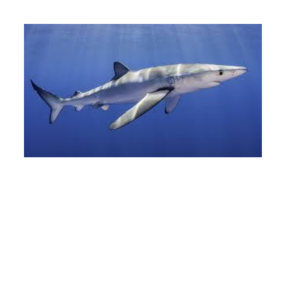

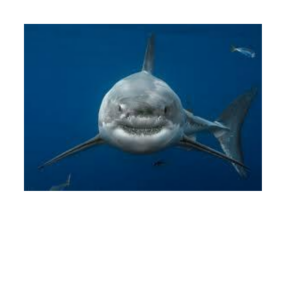

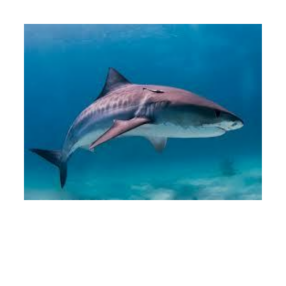

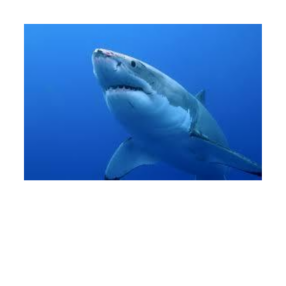

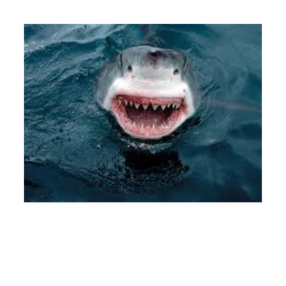

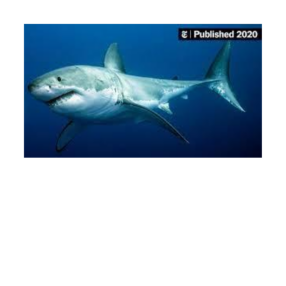

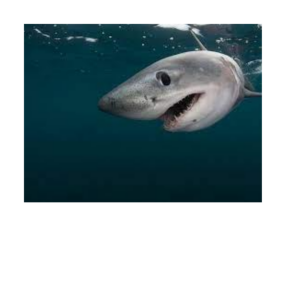

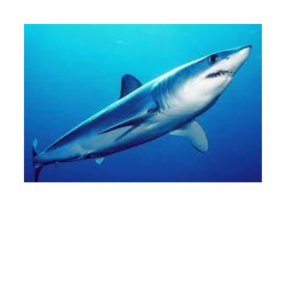

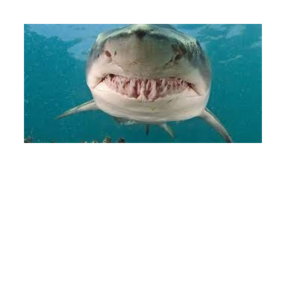

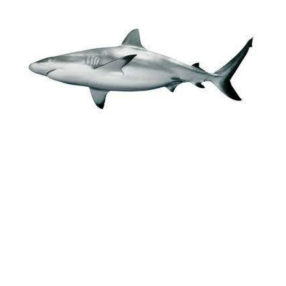

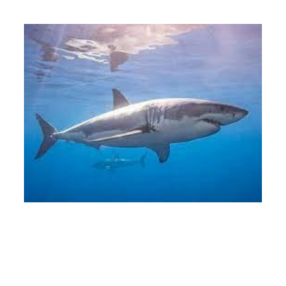

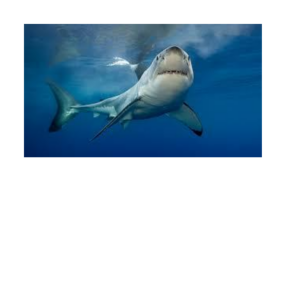

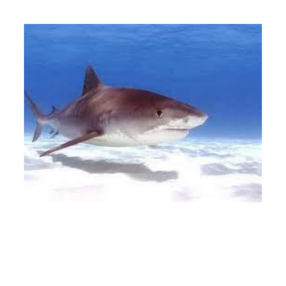

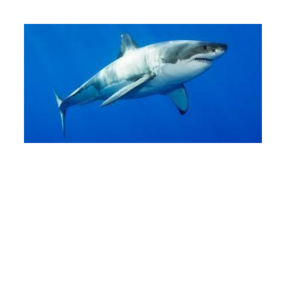

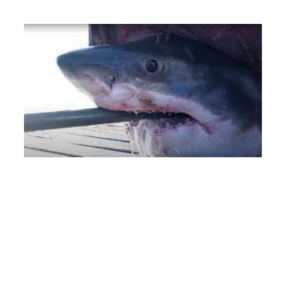

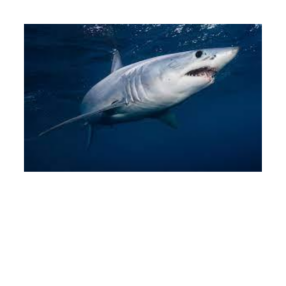

In [5]:
images = []  

for image in get_slides(url): # grabs the images from the slides

    plot(image)

    images.append(load(image)) # loads images in

images = torch.vstack(images) 

In [6]:
images.shape # the shape of the images 

torch.Size([50, 3, 224, 224])

In [7]:
model(images)  # putting images into catgories/ models 

tensor([[ 0.0916, -1.0166,  3.7297,  ..., -3.8421, -3.1805,  1.8728],
        [ 2.3557, -4.2835,  5.6326,  ..., -6.3294, -1.2422, -0.6683],
        [ 3.3384, -1.1095,  3.5961,  ..., -1.6356, -1.4880,  0.8052],
        ...,
        [-2.1134, -1.2267,  5.1121,  ..., -3.6662, -0.0903,  1.0910],
        [ 3.5661,  1.0353,  4.7892,  ...,  0.1021, -0.1649,  1.2555],
        [ 0.4878, -0.8100,  6.5469,  ..., -3.6485, -0.8930,  3.1521]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [8]:
y = model(images) # gives model(images) the name y

In [9]:
y.shape # the shape of the y variable dataset

torch.Size([50, 1000])

In [10]:
guesses = torch.argmax(y, 1).cpu().numpy() # renames torch.argmax

In [11]:
for i in list(guesses): # guesses the labels from the images 
    print(labels[i]) # prints the labels created from the pictures

snorkel
Scottish deerhound, deerhound
sea lion
platypus, duckbill, duckbilled platypus, duck-billed platypus, Ornithorhynchus anatinus
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
ptarmigan
piggy bank, penny bank
Kerry blue terrier
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
web site, website, internet site, site
bathing cap, swimming cap
Weimaraner
horizontal bar, high bar
dugong, Dugong dugon
snorkel
dugong, Dugong dugon
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
goose
grey whale, gray whale, devilfish, Eschrichtius gibbosus, Eschrichtius robustus
quill, quill pen
albatross, mollymawk
iron, smoothing iron
dugong, Dugong dugon
dugong, Dugong dugon
hammerhead, hammerhead shark
tiger shark, Galeocerdo cuvieri
screen, CRT screen
power drill
airship, dirigible
dugong, Dugong dugon
great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias

In [12]:
Y = np.zeros(50,)
Y[25:] = 1

In [13]:
Y # the array for y 

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
X = y.detach().cpu().numpy() # giving a value towards x 

In [15]:
X.shape # the shape of the x variable dataset

(50, 1000)

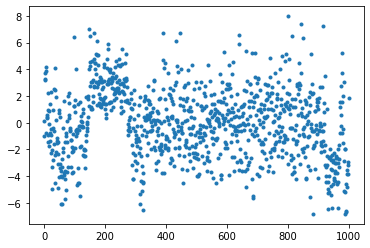

In [16]:
plt.plot(X[0],'.') # plots the x variable dataset 

In [17]:
X[0] # the array for x value 

array([ 9.15811807e-02, -1.01659036e+00,  3.72969675e+00,  3.25961232e+00,
        3.17904186e+00,  3.87628675e+00,  4.14415598e+00, -7.83520460e-01,
        3.32396388e-01,  6.03457689e-01,  4.21942353e-01, -1.41195846e+00,
        9.51280475e-01,  2.18793201e+00, -9.39881384e-01, -1.73309815e+00,
       -1.13088548e-01,  8.95865738e-01,  1.37936568e+00, -7.88652539e-01,
       -1.34093261e+00,  2.31666064e+00, -9.36886013e-01, -4.86825883e-01,
       -2.25524449e+00, -4.92942190e+00, -2.06484151e+00, -3.28515577e+00,
       -2.76687407e+00,  9.25262809e-01, -4.31121469e-01, -1.59411049e+00,
       -6.30402029e-01,  2.53660750e+00,  4.13297939e+00, -2.40923882e+00,
        2.41411996e+00, -4.50808096e+00,  1.98989093e-01,  1.90479314e+00,
       -2.23053193e+00, -1.54931319e+00, -1.37338734e+00, -1.15570903e+00,
       -2.36529493e+00, -1.45031250e+00, -3.11173725e+00, -4.92526484e+00,
       -4.10411263e+00,  7.08846033e-01,  9.44574296e-01,  4.29151654e-01,
       -3.42090821e+00, -

In [18]:
np.argmax(X[0]) #function returns indices of the max element of the array in a particular axis

801

In [19]:
labels[801] # the label at 801

'snorkel'

In [20]:
np.argsort(X[0])[::-1][0:10] #function is used to perform an indirect sort along the given axis using the algorithm specified by the kind keyword

array([801, 842, 916, 148, 389, 445, 164, 639, 150, 814])

In [21]:
top_ten = np.argsort(X[0])[::-1][0:10] # renames the np,argsort to top ten 

In [22]:
for i in top_ten:
  print(labels[i]) # prints the top ten labels found in the images 

snorkel
swimming trunks, bathing trunks
web site, website, internet site, site
killer whale, killer, orca, grampus, sea wolf, Orcinus orca
barracouta, snoek
bikini, two-piece
bluetick
maillot, tank suit
sea lion
speedboat


(array([ 18.,  52., 125., 164., 220., 201., 137.,  54.,  19.,  10.]),
 array([-6.8328457 , -5.3523583 , -3.8718712 , -2.3913841 , -0.9108969 ,
         0.56959033,  2.0500774 ,  3.5305648 ,  5.011052  ,  6.491539  ,
         7.9720263 ], dtype=float32),
 <a list of 10 Patch objects>)

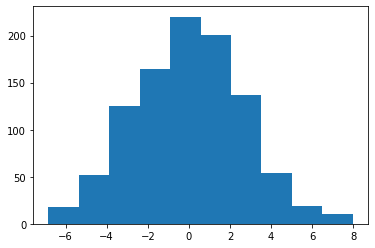

In [23]:
plt.hist(X[0]) # histogram for the top 10 images 

In [24]:
X = GPU_data(X) # analyze data for x
Y = GPU_data(Y) # analyze data for y

In [25]:
def softmax(x): # incorporating the softmax activation function
    s1 = torch.exp(x - torch.max(x,1)[0][:,None])
    s = s1 / s1.sum(1)[:,None]
    return s

In [26]:
def cross_entropy(outputs, labels): # incorporating the binary cross-entropy              
    return -torch.sum(softmax(outputs).log()[range(outputs.size()[0]), labels.long()])/outputs.size()[0]  

In [27]:
def randn_trunc(s): #Truncated Normal Random Numbers
    mu = 0 
    sigma = 0.1
    R = stats.truncnorm((-2*sigma - mu) / sigma, (2*sigma - mu) / sigma, loc=mu, scale=sigma)
    return R.rvs(s)

In [28]:
def Truncated_Normal(size): # normal numbers 

    u1 = torch.rand(size)*(1-np.exp(-2)) + np.exp(-2)
    u2 = torch.rand(size)
    z  = torch.sqrt(-2*torch.log(u1)) * torch.cos(2*np.pi*u2)

    return z

In [29]:
def acc(out,y):
    with torch.no_grad():
        return (torch.sum(torch.max(out,1)[1] == y).item())/y.shape[0]

In [30]:
X.shape # shows x shape 

torch.Size([50, 1000])

In [31]:
def get_batch(mode): # batching the tensors 
    b = c.b
    if mode == "train":
        r = np.random.randint(X.shape[0]-b) 
        x = X[r:r+b,:]
        y = Y[r:r+b]
    elif mode == "test":
        r = np.random.randint(X_test.shape[0]-b)
        x = X_test[r:r+b,:]
        y = Y_test[r:r+b]
    return x,y

In [32]:
def model(x,w):

    return x@w[0] #returning the updated maximum values of x and w tensors

In [33]:
def make_plots(): #making plots for the specificied variables
    
    acc_train = acc(model(x,w),y)
    
    # xt,yt = get_batch('test')

    # acc_test = acc(model(xt,w),yt)

    wb.log({"acc_train": acc_train})

In [37]:
wb.init(project="Linear_Model_Photo_1"); #creating a project of pytorch linear model
c = wb.config

c.h = 0.001
c.b = 32
c.epochs = 100000

w = [GPU(Truncated_Normal((1000,2)))]

optimizer = torch.optim.Adam(w, lr=c.h)  

for i in range(c.epochs): #returns a sequence of numbers, starting from 0 by default, and increments by 1 (by default), and stops before a specified number

    x,y = get_batch('train')

    loss = cross_entropy(softmax(model(x,w)),y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
   
    wb.log({"loss": loss})

    make_plots()


acc_train,▄▂▇▁▃▆▅▃▃▅▆▃▇▅▇▆█▅▆▅█▅▅█▆▅▆▅█▆▅▅▅▇▅▆█▅▆▅
loss,▅▇▂█▆▃▄▆▆▄▃▆▂▄▂▃▁▄▃▄▁▄▄▁▃▄▃▄▁▃▄▄▄▂▄▃▁▄▃▄
acc_train,0.75
loss,0.56326


<ipython-input-2-4608b466ff03>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  return torch.tensor(data, requires_grad=True, dtype=torch.float, device=torch.device('cuda'))


the first run: 


*   acc_ train   0.875
*   loss 0.43826



the second run:


*   acc_train 0.3125
*   loss 1.00076



the third run:


*   acc_train 0.75
*   loss 0.56326



In [2]:
url = "https://wandb.ai/abbyleppert/Linear_Model_Photo_1/reports/Graphs---VmlldzozMTUzODU5?accessToken=r1tupdian1c8ktg89iw1t7q0eqxrp4quu9d8brr0kt3mh2628nt4xq6n5mqql1uw"

In [ ]:
#The url to my graphs created from running the code 3 times 